# Problem statement- The following a dataset for covid-19 cases recorded in india started 2020-01-30 till 2020-09-19



# The problem is to forecast the cases for next two months


# The scope of study- This study gives us an opportunity to be prepared for the cases prior and arrange the medical conditions accordingly 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas import datetime

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [2]:
def parser(x):
    return pd.datetime.strptime(x,"%d-%m-%Y")
df=pd.read_csv("india.csv",parse_dates=["Date_reported"],index_col="Date_reported",date_parser=parser)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [3]:
df.head()

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-01-30,IN,India,SEARO,5,5,0,0
2020-01-31,IN,India,SEARO,0,5,0,0
2020-02-01,IN,India,SEARO,0,5,0,0
2020-02-02,IN,India,SEARO,1,6,0,0
2020-02-03,IN,India,SEARO,1,7,0,0


In [4]:
df.columns

Index([' Country_code', ' Country', ' WHO_region', ' New_cases',
       ' Cumulative_cases', ' New_deaths', ' Cumulative_deaths'],
      dtype='object')

# As the problem statement wants to forecast the values for new cases only that makes New_cases the considerable feature 

In [5]:
dff=df.drop([ ' Country_code', ' Country', ' WHO_region', ' Cumulative_cases', ' New_deaths', ' Cumulative_deaths'],axis=1)

In [6]:
dff.head()

,New_cases
Date_reported,
2020-01-30,5
2020-01-31,0
2020-02-01,0
2020-02-02,1
2020-02-03,1


In [7]:
time1 = dff[" New_cases"]
time1.head()

Date_reported
2020-01-30    5
2020-01-31    0
2020-02-01    0
2020-02-02    1
2020-02-03    1
Name:  New_cases, dtype: int64

In [8]:
time1.head()

Date_reported
2020-01-30    5
2020-01-31    0
2020-02-01    0
2020-02-02    1
2020-02-03    1
Name:  New_cases, dtype: int64

In [9]:
time1.tail()

Date_reported
2020-09-15    83809
2020-09-16    90123
2020-09-17    97894
2020-09-18    96424
2020-09-19    93337
Name:  New_cases, dtype: int64

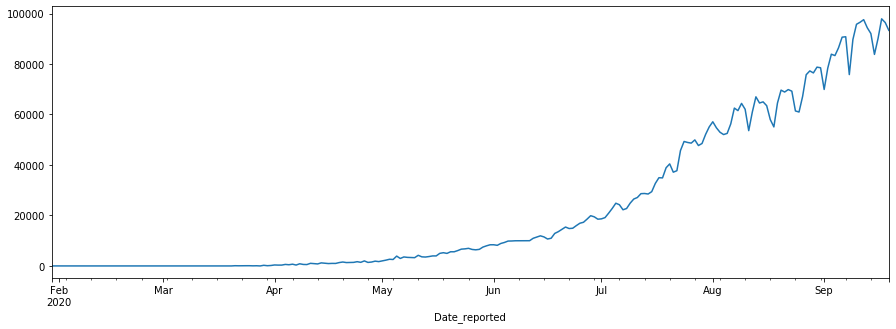

In [10]:
time1.plot(kind="line",figsize=(15,5))
plt.show()

# Decomposing the data to see the compponents of the data 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


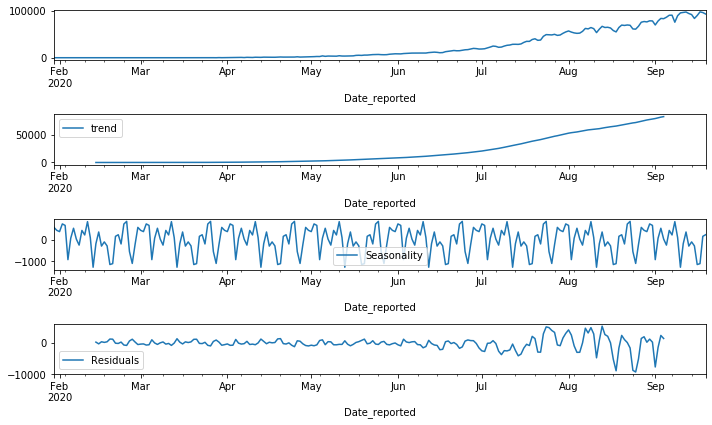

In [11]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(time1,model='additive', freq=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
time1.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Exponential Smoothing

In [12]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [13]:
hes = ExponentialSmoothing(dff, trend='add').fit()
hes.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


Dep. Variable:,endog,No. Observations:,234
Model:,ExponentialSmoothing,SSE,1613416159.472
Optimized:,True,AIC,3692.634
Trend:,Additive,BIC,3706.455
Seasonal:,None,AICC,3693.004
Seasonal Periods:,None,Date:,"Wed, 30 Sep 2020"
Box-Cox:,False,Time:,12:05:47
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_slope,0.000000,beta,True


In [14]:
hes1 = hes.forecast(60)

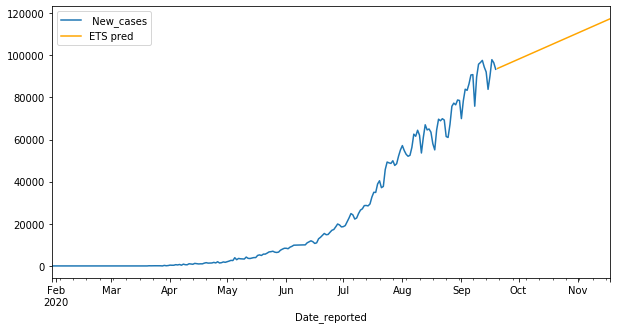

In [15]:
dff.plot(kind="line",figsize=(10,5),legend=True)
hes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [16]:
hwes = ExponentialSmoothing(dff , seasonal_periods=110 ,trend='add', seasonal="additive").fit()
hwes.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Dep. Variable:,endog,No. Observations:,234
Model:,ExponentialSmoothing,SSE,1293142740.093
Optimized:,True,AIC,3860.855
Trend:,Additive,BIC,4254.761
Seasonal:,Additive,AICC,4092.855
Seasonal Periods:,110,Date:,"Wed, 30 Sep 2020"
Box-Cox:,False,Time:,12:05:47
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6315789,alpha,True
smoothing_slope,0.0400345,beta,True


In [17]:
hwes1 = hwes.forecast(60)
#print(hwes1)

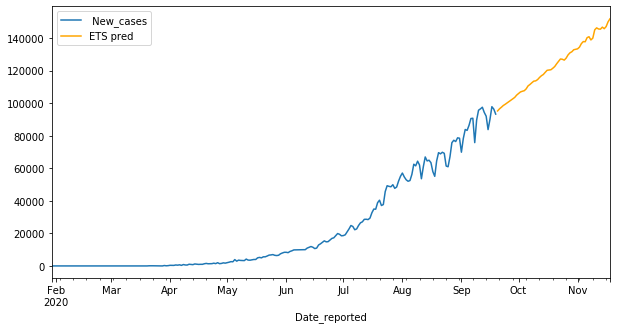

In [18]:
dff.plot(kind="line",figsize=(10,5),legend=True)

hwes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

# ARIMA

In [19]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  
    #Determing rolling statistics
    rolmean=pd.core.window.Rolling(timeseries, window=12).mean()
    rolstd = pd.core.window.Rolling(timeseries, window=12).std()



    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
# H0: series is nonstationary
# H1: series is stationary

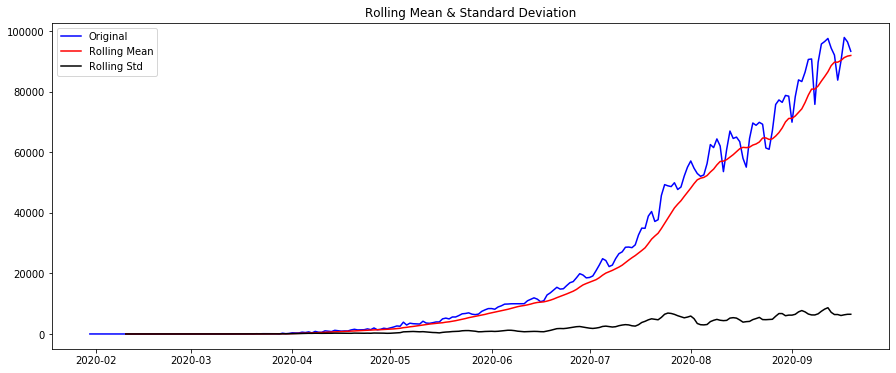

Results of Dickey-Fuller Test:
Test Statistic                   0.281721
p-value                          0.976490
#Lags Used                      15.000000
Number of Observations Used    218.000000
Critical Value (1%)             -3.460708
Critical Value (5%)             -2.874891
Critical Value (10%)            -2.573886
dtype: float64


In [20]:
test_stationarity(time1)

In [21]:
diff1=dff.diff()
diff1=diff1.dropna()
diff1 = diff1[" New_cases"]

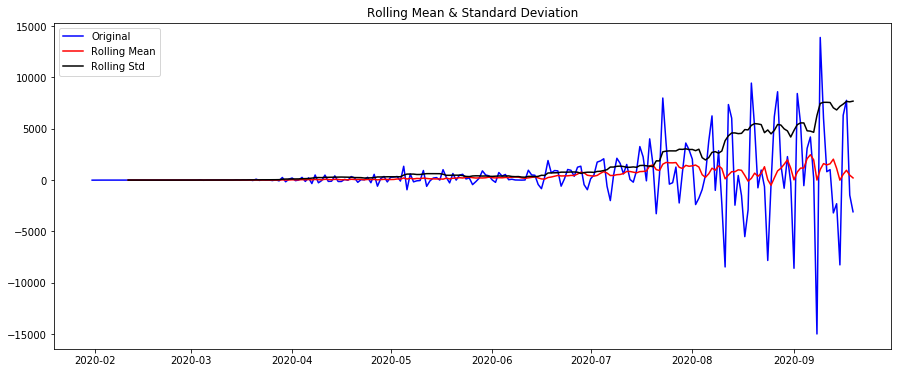

Results of Dickey-Fuller Test:
Test Statistic                  -2.066935
p-value                          0.258016
#Lags Used                      15.000000
Number of Observations Used    217.000000
Critical Value (1%)             -3.460849
Critical Value (5%)             -2.874953
Critical Value (10%)            -2.573919
dtype: float64


In [22]:
test_stationarity(diff1)

In [23]:
diff2=diff1.diff()
diff2=diff2.dropna()

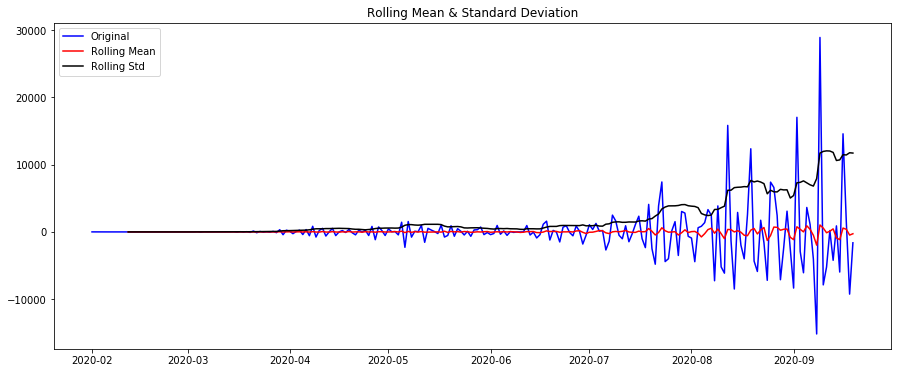

Results of Dickey-Fuller Test:
Test Statistic                -6.529931e+00
p-value                        9.928289e-09
#Lags Used                     1.300000e+01
Number of Observations Used    2.180000e+02
Critical Value (1%)           -3.460708e+00
Critical Value (5%)           -2.874891e+00
Critical Value (10%)          -2.573886e+00
dtype: float64


In [24]:
test_stationarity(diff2)

In [25]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

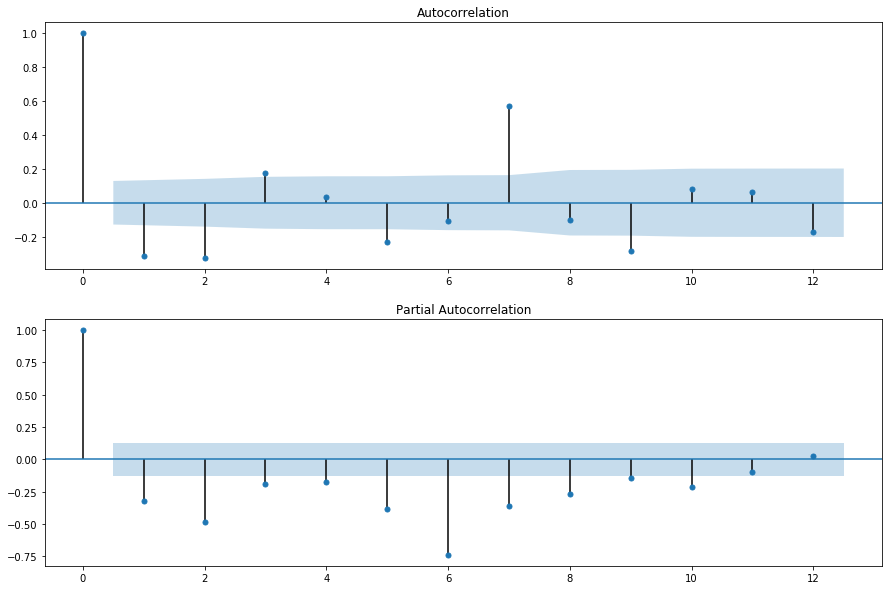

In [26]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diff2, ax=pyplot.gca(),lags=12)
pyplot.subplot(212)
plot_pacf(diff2, ax=pyplot.gca(),lags=12)
pyplot.show()

In [27]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [28]:
from pmdarima import auto_arima
model = auto_arima(dff, start_p=0, start_q=0,
                           max_p=3, max_q=3, m=12,
                           start_P=0, start_Q=0, max_P=2, max_Q=2, seasonal=True,
                           d=2, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True
                          )
model.fit(dff)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=4391.508, Time=0.04 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=4294.859, Time=0.62 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.70 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=4380.754, Time=0.04 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=4279.867, Time=1.69 sec
 ARIMA(1,2,0)(2,1,1)[12]             : AIC=4235.589, Time=3.88 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=4236.849, Time=1.12 sec
 ARIMA(1,2,0)(2,1,2)[12]             : AIC=inf, Time=5.67 sec
 ARIMA(1,2,0)(1,1,2)[12]             : AIC=inf, Time=4.64 sec
 ARIMA(0,2,0)(2,1,1)[12]             : AIC=4271.908, Time=1.16 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=4166.094, Time=4.13 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=1.82 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=4235.795, Time=1.39 sec
 ARIMA(2,2,0)(2,1,2)[12]             : AIC=4175.536, Time=5.72 sec
 ARIMA(2,2,0)(1,1,0)[12]             : 

ARIMA(maxiter=50, method='lbfgs', order=(3, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(2, 1, 1, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [29]:
model = sm.tsa.SARIMAX(dff, order=(3,2,0), seasonal_order=(2,1,1,12))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [30]:
model_fit=model.fit(disp=True)
print(model_fit.summary())


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                      SARIMAX Results                                       
Dep. Variable:                            New_cases   No. Observations:                  234
Model:             SARIMAX(3, 2, 0)x(2, 1, [1], 12)   Log Likelihood               -2063.096
Date:                              Wed, 30 Sep 2020   AIC                           4140.193
Time:                                      12:07:23   BIC                           4163.948
Sample:                                  01-30-2020   HQIC                          4149.786
                                       - 09-19-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9220      0.034    -27.056      0.000      -0.989      -0.855
ar.L2         -0.93

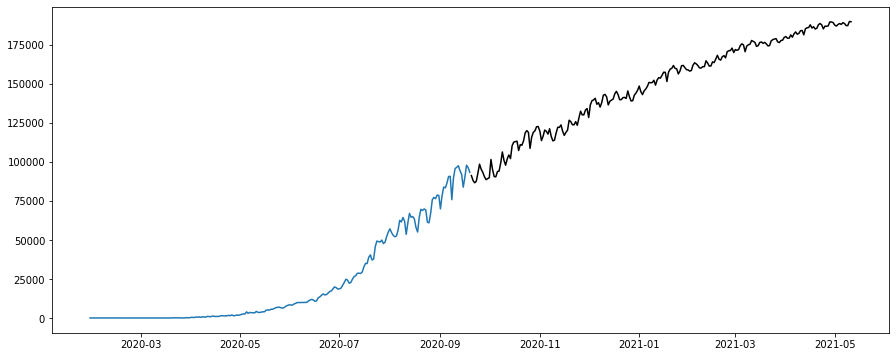

In [35]:
forecast = model_fit.forecast(steps=234)
#print(forecast)

plt.plot(dff)
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_absolute_error(y_true=dff,y_pred=forecast))

126129.55362456496


In [33]:
len(forecast)

60

In [34]:
dff.shape

(234, 1)